<a href="https://colab.research.google.com/github/abhipise2704/Deep_Learning-/blob/master/Assignment_13_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 13
## Keras -- CNN on MNIST
## abhipise2704@gmail.com_13

## 1.Importing Library & Data from Keras Inbuilt Library 

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 2.Model_1 with 3 Conv Layers CNN on MNIST DATASET

In [0]:
model_1 = Sequential()
model_1.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.8))

model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))
model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes, activation='softmax'))
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_35 (Batc (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 64)        73792     
_________________________________________________________________
batch_normalization_36 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 64)        

## 2.1 Compilation & Model Evaluation On Test Data

In [0]:
model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 338us/step - loss: 1.3639 - accuracy: 0.5570 - val_loss: 3.6014 - val_accuracy: 0.1156
Epoch 2/12
60000/60000 [==============================] - 13s 210us/step - loss: 0.5312 - accuracy: 0.8335 - val_loss: 0.1538 - val_accuracy: 0.9522
Epoch 3/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.3798 - accuracy: 0.8824 - val_loss: 0.1100 - val_accuracy: 0.9646
Epoch 4/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.3223 - accuracy: 0.9017 - val_loss: 0.1025 - val_accuracy: 0.9676
Epoch 5/12
60000/60000 [==============================] - 13s 210us/step - loss: 0.2947 - accuracy: 0.9112 - val_loss: 0.0983 - val_accuracy: 0.9685
Epoch 6/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.2751 - accuracy: 0.9180 - val_loss: 0.0879 - val_accuracy: 0.9716
Epoch 7/12
60000/60000 [==============================] 

## 2.3 'Accuracy (Training & Validation) vs No of Epoch'

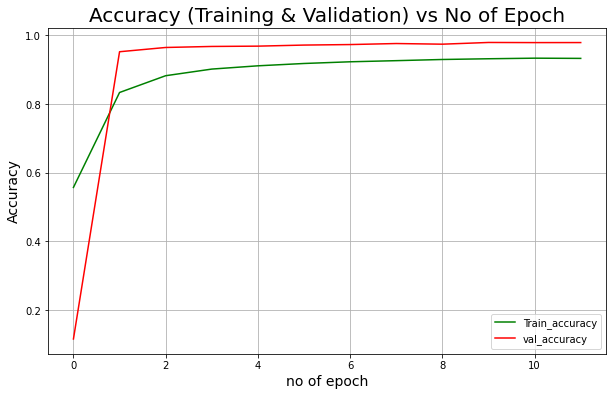

In [0]:
model_1.metrics_names

import pandas as pd
import numpy as np
losses = pd.DataFrame(model_1.history.history)

losses.head(2)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))

plt.plot(losses['accuracy'],color='green',label='Train_accuracy')
plt.plot(losses['val_accuracy'],color='red',label='val_accuracy')
plt.xlabel('no of epoch',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy (Training & Validation) vs No of Epoch',fontsize=20)
plt.legend()
plt.grid()

## 2.4 Confusion Matrix of Model_1 CNN

confusion Matrix= 
 [[ 967    1    2    0    1    3    3    3    0    0]
 [   0 1129    2    2    0    0    1    1    0    0]
 [   3    2  991    3    1    0    3   26    3    0]
 [   0    0    4  990    0    5    0   10    1    0]
 [   1    0    0    0  971    0    3    0    0    7]
 [   4    1    0    6    1  874    1    3    1    1]
 [   5    5    0    0    3    2  942    0    1    0]
 [   0    3   20    0    0    1    0 1003    0    1]
 [   0    2    2    1    7    1    2    2  945   12]
 [   3    0    0    0   11    6    0    9    3  977]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(114.0, 0.5, 'True Label')

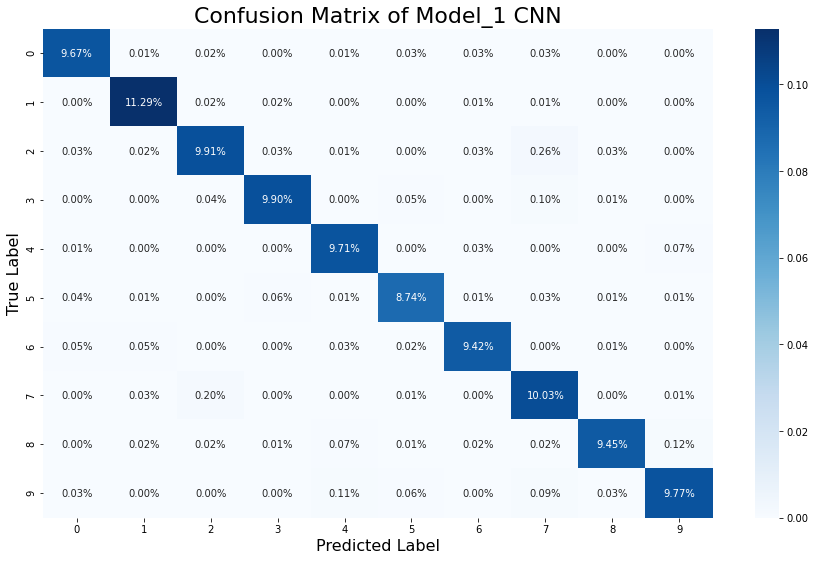

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

rounded_predictions = model_1.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
print("confusion Matrix= \n",cm)

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns

plt.figure(figsize=(15,9))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.title('Confusion Matrix of Model_1 CNN',fontsize=22)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)

# 3.Model_2  with 5 Conv Layer CNN on MNIST DATASET

In [0]:
##https://medium.com/@yugkhanna1/building-a-5-layer-cnn-model-with-keras-to-identify-handwritten-digits-complex-yet-simple-f06b8b375346
model = Sequential()

model.add(Conv2D(32, kernel_size=5,input_shape=input_shape, activation = 'relu'))
model.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 10, 10, 32)        128       
_________________________________________________________________
dropout_73 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 6, 6, 64)        

## 3.1 Compilation & Model Evaluation On Test Data

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 109us/step - loss: 0.2772 - accuracy: 0.9165 - val_loss: 0.0665 - val_accuracy: 0.9794
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0889 - accuracy: 0.9753 - val_loss: 0.0335 - val_accuracy: 0.9909
Epoch 3/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0653 - accuracy: 0.9815 - val_loss: 0.0378 - val_accuracy: 0.9894
Epoch 4/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0575 - accuracy: 0.9850 - val_loss: 0.0364 - val_accuracy: 0.9906
Epoch 5/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0514 - accuracy: 0.9860 - val_loss: 0.0383 - val_accuracy: 0.9889
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0459 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 7/12
60000/60000 [==============================] - 5s 89us/s

## 3.2 'Accuracy (Training & Validation) vs No of Epoch'

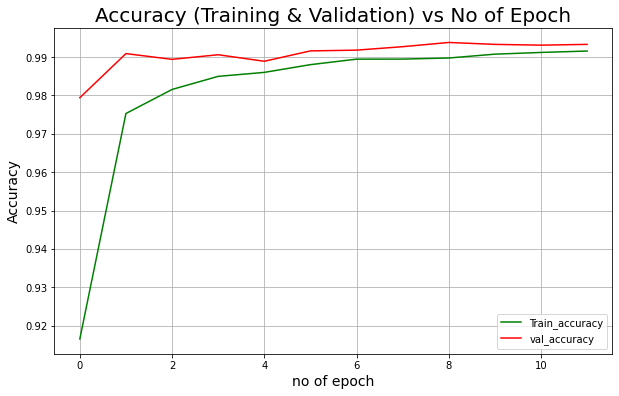

In [0]:
model.metrics_names

import pandas as pd
import numpy as np
losses = pd.DataFrame(model.history.history)

losses.head(2)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))

plt.plot(losses['accuracy'],color='green',label='Train_accuracy')
plt.plot(losses['val_accuracy'],color='red',label='val_accuracy')
plt.xlabel('no of epoch',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy (Training & Validation) vs No of Epoch',fontsize=20)
plt.legend()
plt.grid()

## 3.3 Confusion Matrix of Model_2 with 5 Conv Layers  CNN

confusion Matrix= 
 [[ 973    0    1    0    0    0    1    1    0    4]
 [   0 1132    0    0    0    0    1    2    0    0]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  976    0    0    0    0    6]
 [   2    0    0    7    0  879    1    1    0    2]
 [   4    4    0    0    1    1  946    0    2    0]
 [   0    3    3    0    0    0    0 1021    0    1]
 [   0    0    2    0    0    1    0    0  969    2]
 [   0    0    0    0    5    0    0    3    0 1001]]


Text(114.0, 0.5, 'True Label')

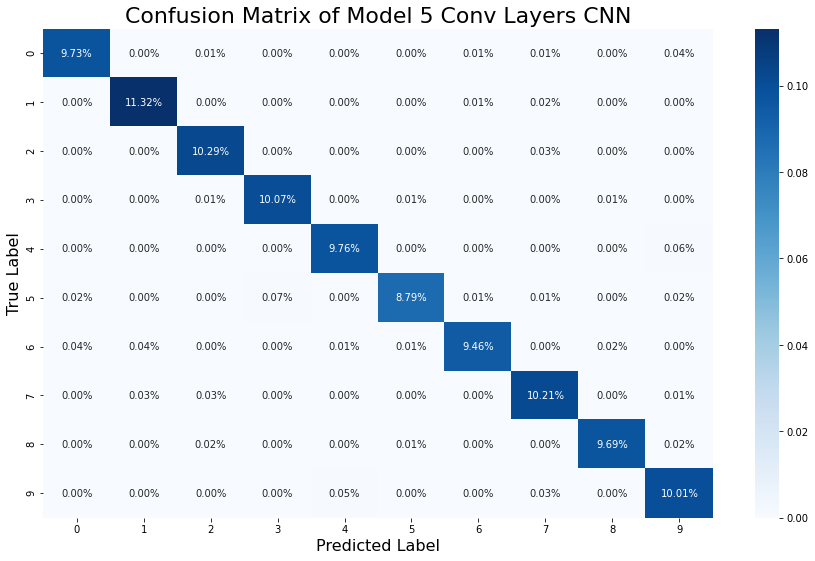

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

rounded_predictions = model.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
print("confusion Matrix= \n",cm)

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns

plt.figure(figsize=(15,9))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.title('Confusion Matrix of Model 5 Conv Layers CNN',fontsize=22)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)

# 4.Model_3 CNN on MNIST DATASET with 7 Conv Layer

In [0]:
##https://medium.com/@yugkhanna1/building-a-5-layer-cnn-model-with-keras-to-identify-handwritten-digits-complex-yet-simple-f06b8b375346

model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=5,input_shape=input_shape, activation = 'relu'))
model_3.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model_3.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model_3.add(Conv2D(64, kernel_size=3,activation = 'relu'))

model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model_3.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model_3.add(MaxPooling2D(pool_size=(1, 1)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Conv2D(256, kernel_size=3, activation = 'relu'))
model_3.add(BatchNormalization())


model_3.add(Flatten())
model_3.add(Dense(256, activation = "relu"))
model_3.add(Dropout(0.4))
model_3.add(Dense(128, activation = "relu"))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation = "softmax"))

model_3.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_201 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 20, 20, 32)        25632     
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
dropout_121 (Dropout)        (None, 8, 8, 64)        

## 4.1 Compilation & Model Evaluation On Test Data

In [0]:
model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.2998 - accuracy: 0.9119 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 2/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0986 - accuracy: 0.9743 - val_loss: 0.0707 - val_accuracy: 0.9841
Epoch 3/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0710 - accuracy: 0.9817 - val_loss: 0.0295 - val_accuracy: 0.9920
Epoch 4/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0570 - accuracy: 0.9849 - val_loss: 0.0442 - val_accuracy: 0.9873
Epoch 5/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0509 - accuracy: 0.9868 - val_loss: 0.0307 - val_accuracy: 0.9921
Epoch 6/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0444 - accuracy: 0.9889 - val_loss: 0.0410 - val_accuracy: 0.9892
Epoch 7/12
60000/60000 [==============================] - 8s 1

## 4.2 'Accuracy (Training & Validation) vs No of Epoch'

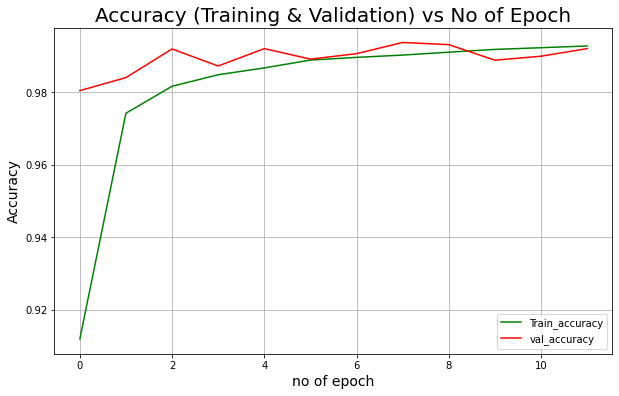

In [0]:
model_3.metrics_names

import pandas as pd
import numpy as np
losses = pd.DataFrame(model_3.history.history)

losses.head(2)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))

plt.plot(losses['accuracy'],color='green',label='Train_accuracy')
plt.plot(losses['val_accuracy'],color='red',label='val_accuracy')
plt.xlabel('no of epoch',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy (Training & Validation) vs No of Epoch',fontsize=20)
plt.legend()
plt.grid()

## 4.3 Confusion Matrix of model_3 with 7 Conv Layers  CNN

confusion Matrix= 
 [[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    2 1018    0    1    0    5    5    0    0]
 [   0    1    0 1007    0    1    0    0    1    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   2    0    0    5    0  876    7    1    1    0]
 [   3    1    0    0    1    0  952    0    1    0]
 [   0    3    1    0    0    1    0 1023    0    0]
 [   0    0    2    0    2    0    0    1  967    2]
 [   1    0    3    0   15    0    0    5    0  985]]


Text(114.0, 0.5, 'True Label')

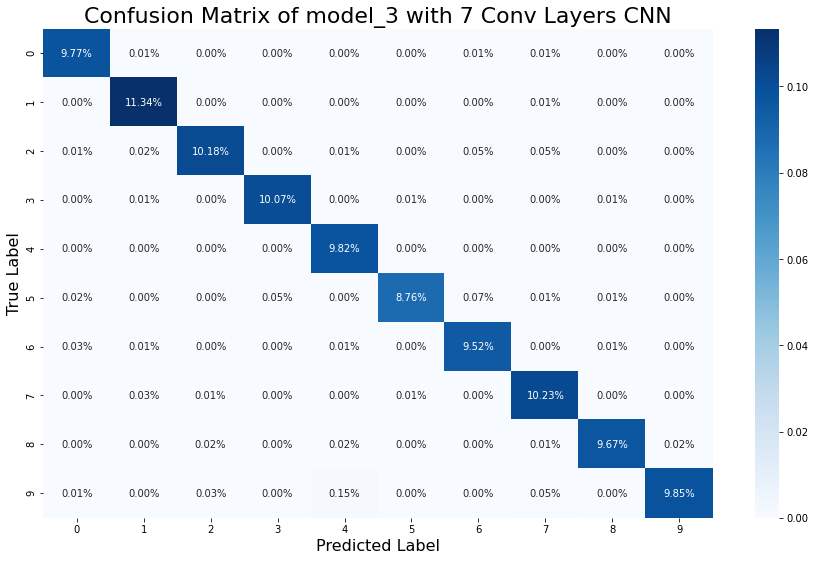

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

rounded_predictions = model_3.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
print("confusion Matrix= \n",cm)

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns

plt.figure(figsize=(15,9))
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='Blues')
plt.title('Confusion Matrix of model_3 with 7 Conv Layers CNN',fontsize=22)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Number of Conv Layers", "Test Accuracy"]

x.add_row(["Model_1_CNN", 3,  '97.89%'])
x.add_row(["Model_2_CNN", 5,  '99.33%'])
x.add_row(["Model_3_CNN", 7, '99.21%'])

print(x)


+-------------+-----------------------+---------------+
|    Model    | Number of Conv Layers | Test Accuracy |
+-------------+-----------------------+---------------+
| Model_1_CNN |           3           |     97.89%    |
| Model_2_CNN |           5           |     99.33%    |
| Model_3_CNN |           7           |     99.21%    |
+-------------+-----------------------+---------------+
